In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")

C:\Users\Sarah\AppData\Local\Temp\ipykernel_5876\3101145777.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 4))


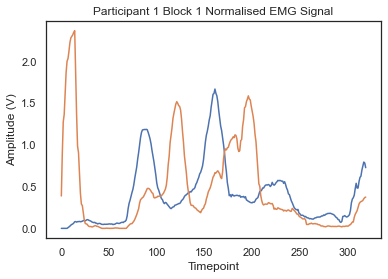

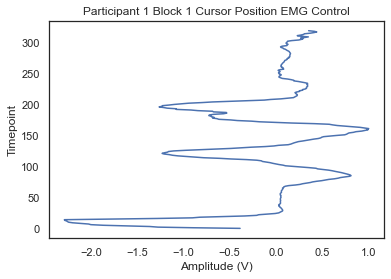

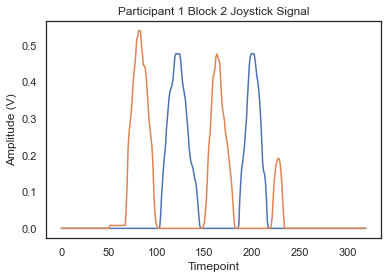

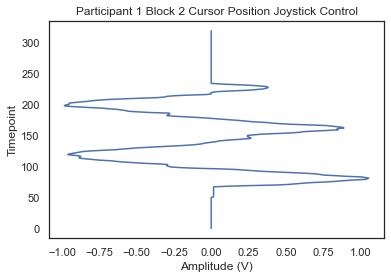

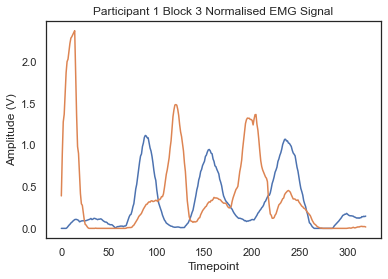

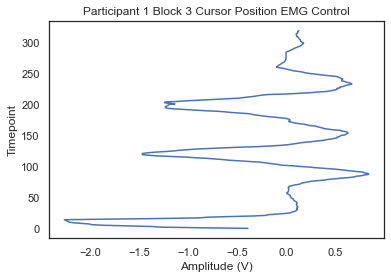

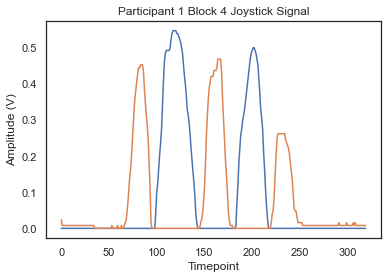

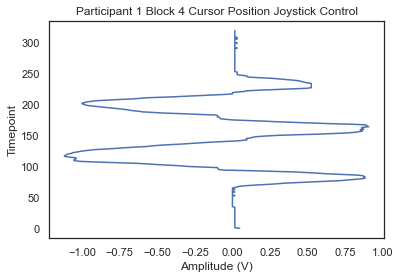

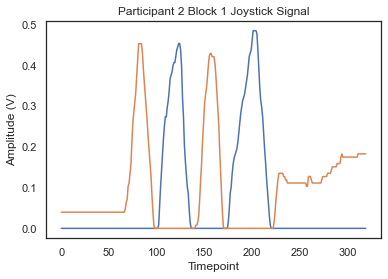

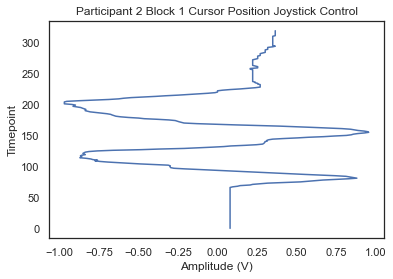

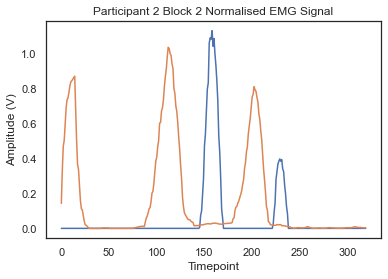

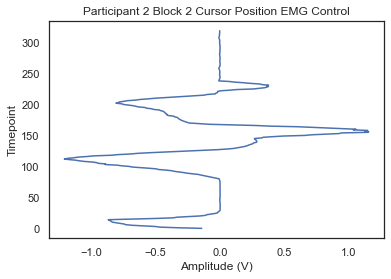

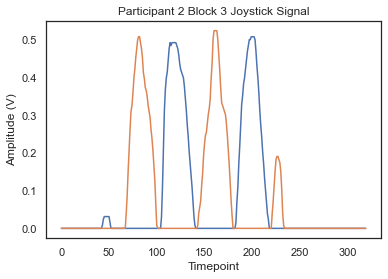

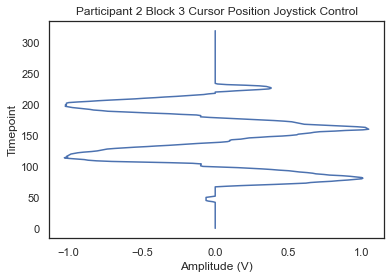

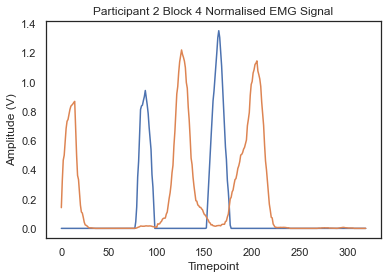

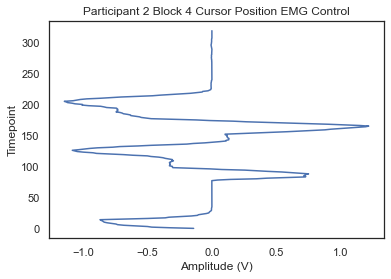

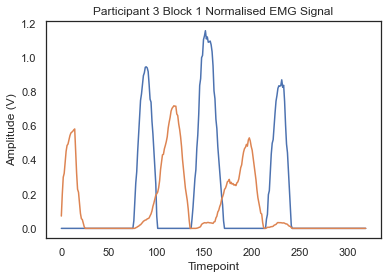

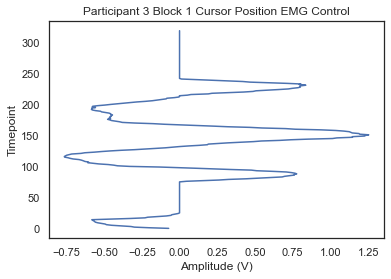

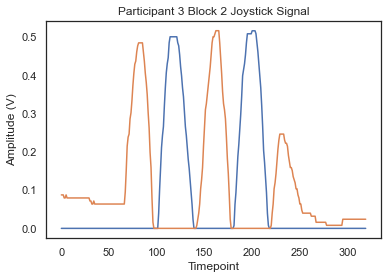

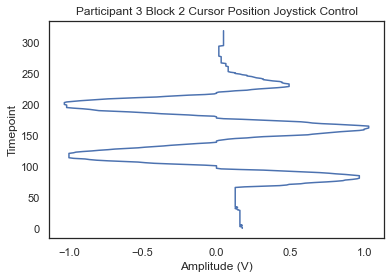

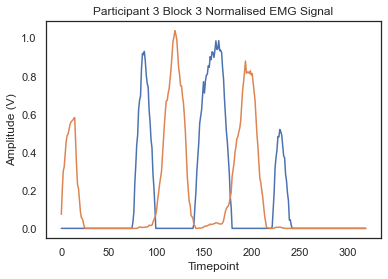

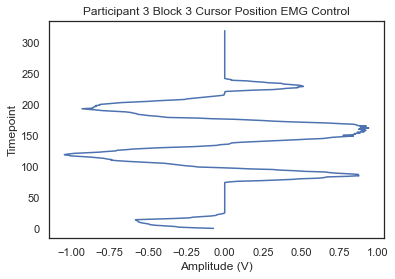

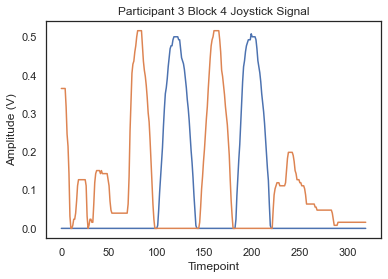

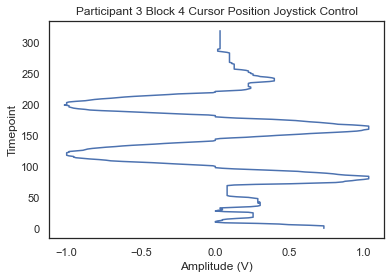

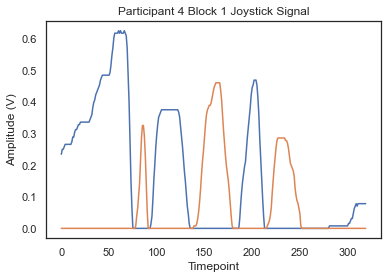

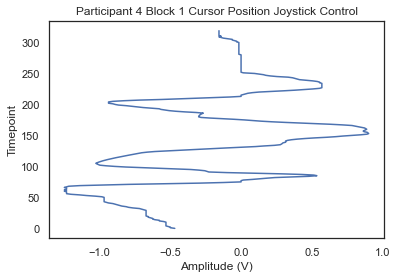

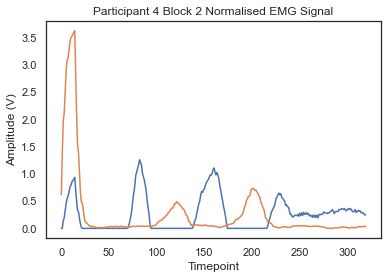

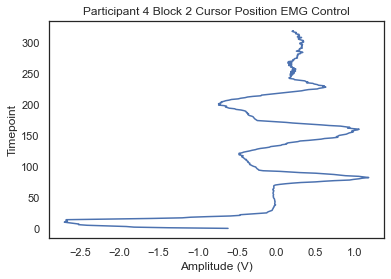

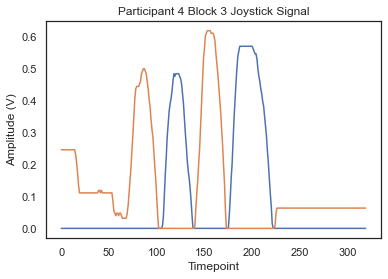

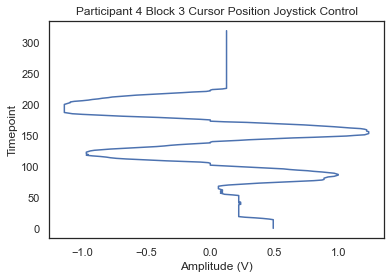

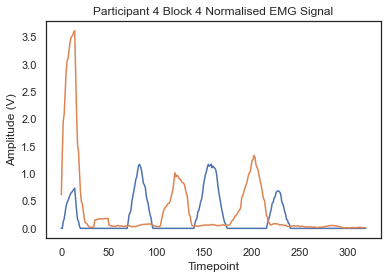

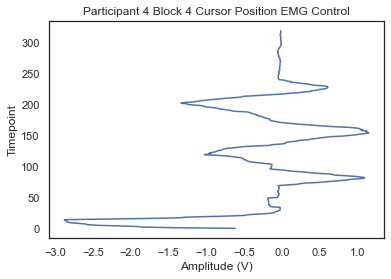

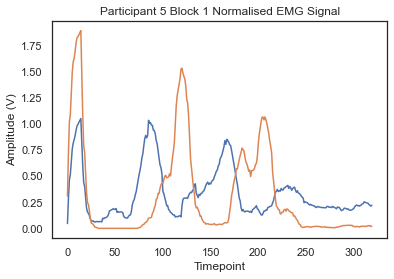

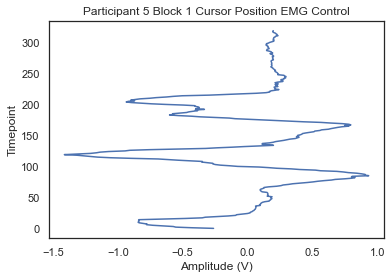

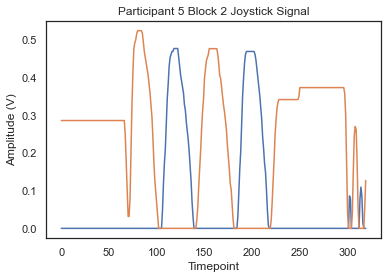

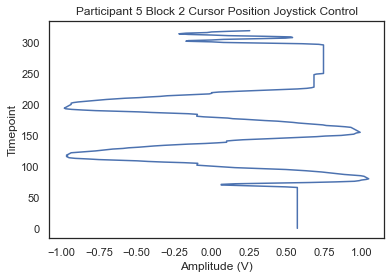

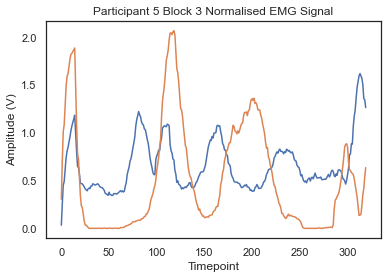

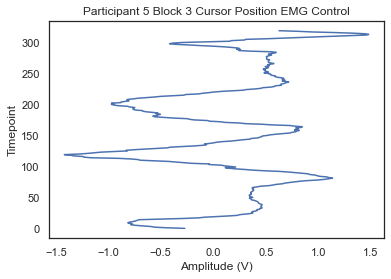

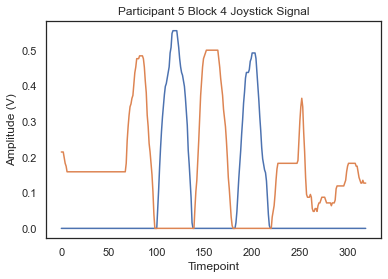

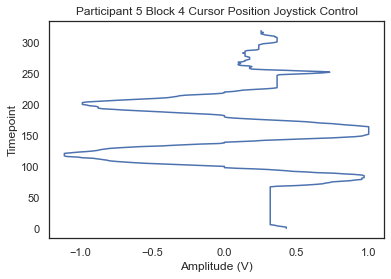

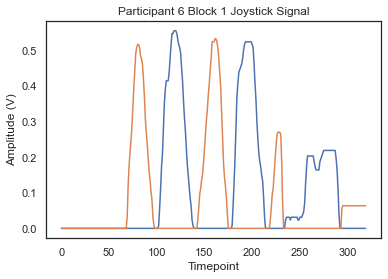

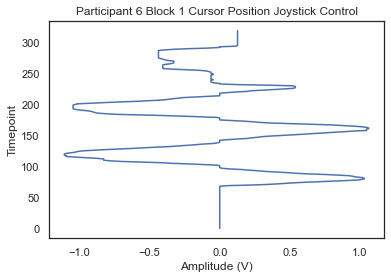

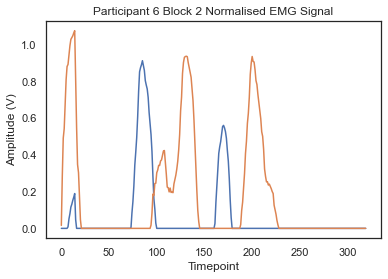

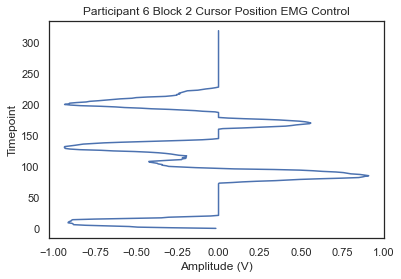

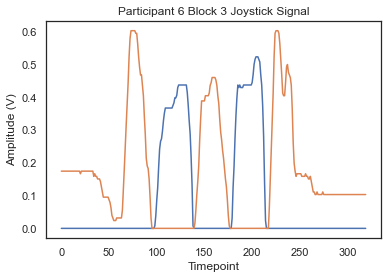

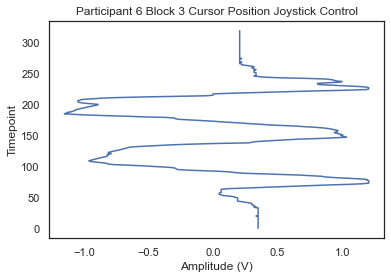

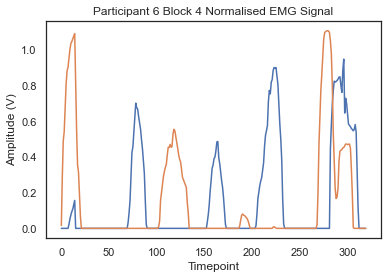

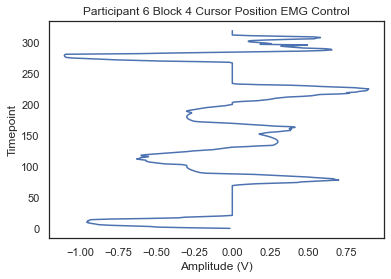

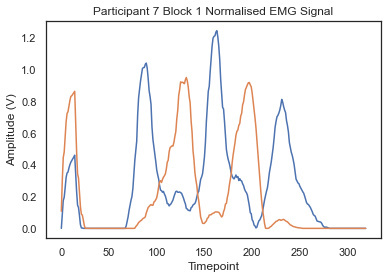

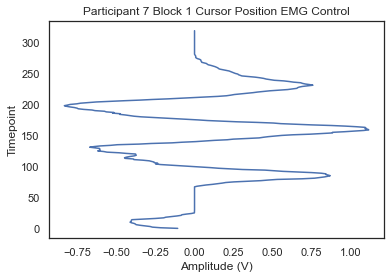

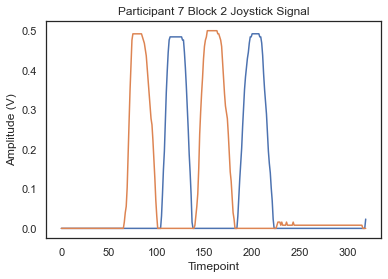

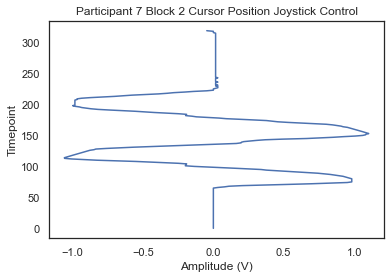

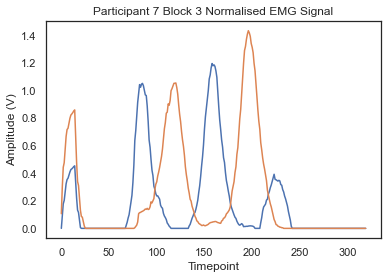

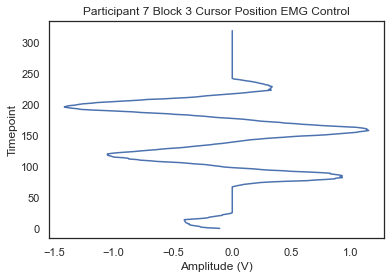

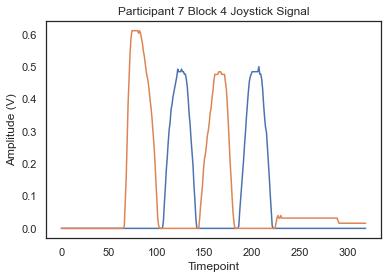

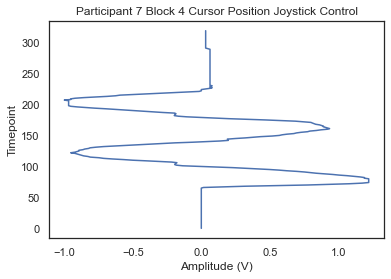

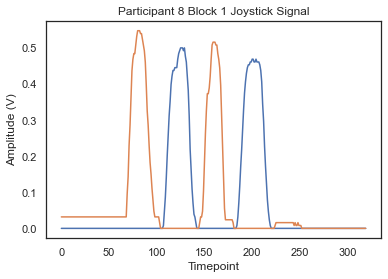

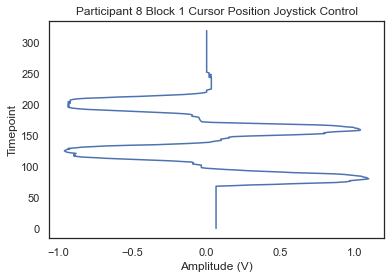

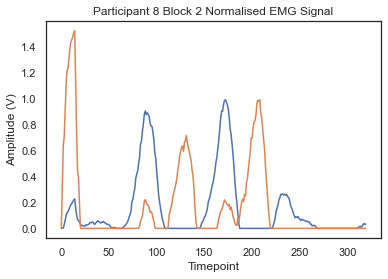

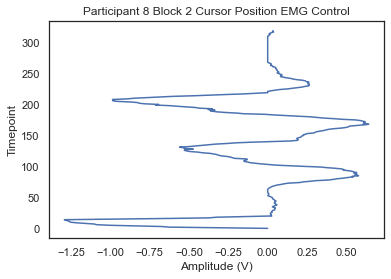

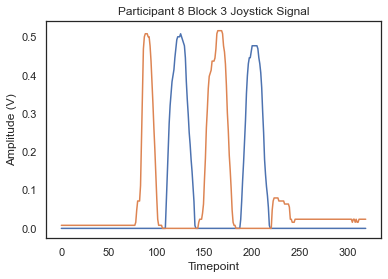

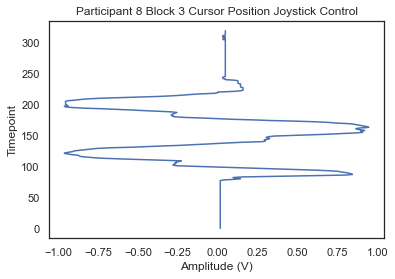

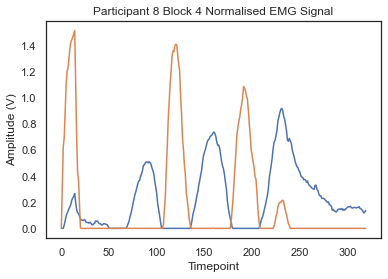

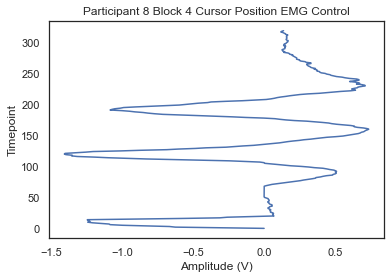

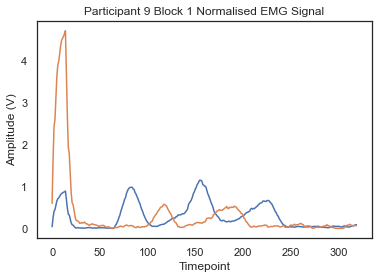

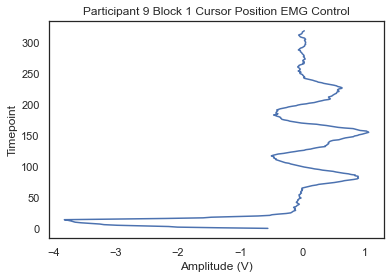

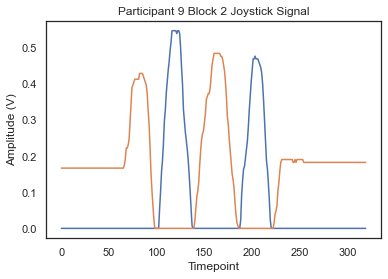

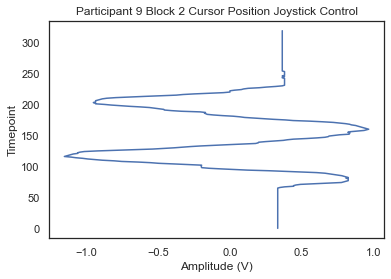

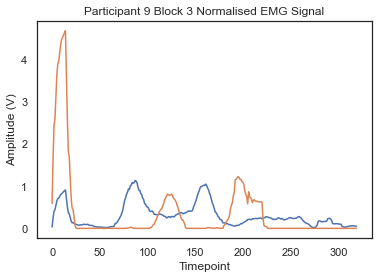

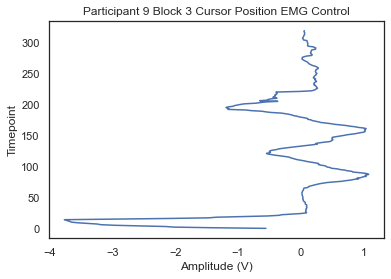

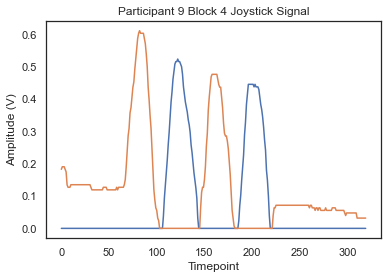

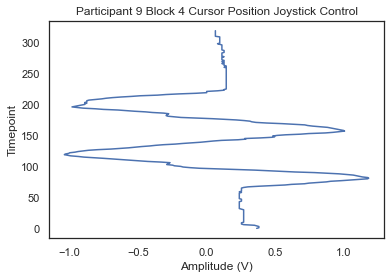

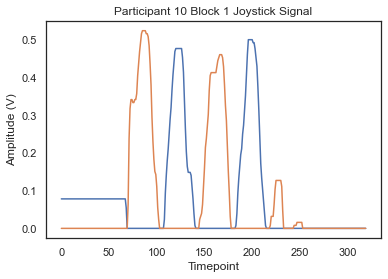

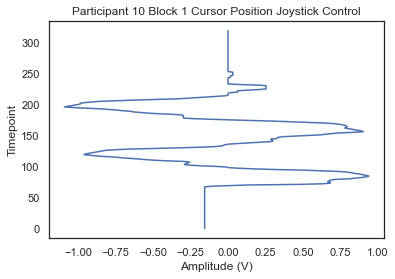

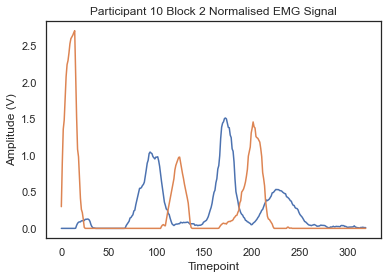

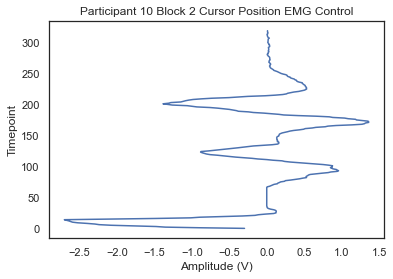

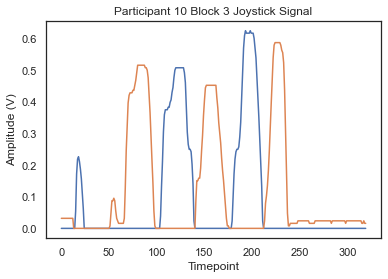

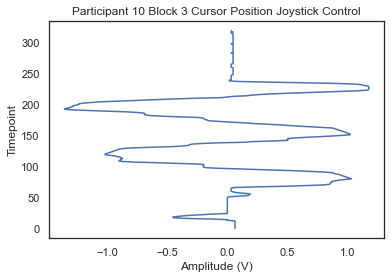

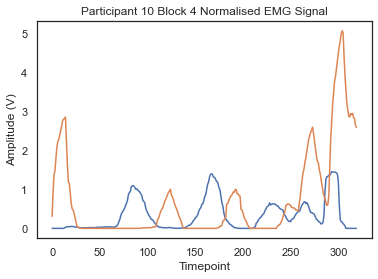

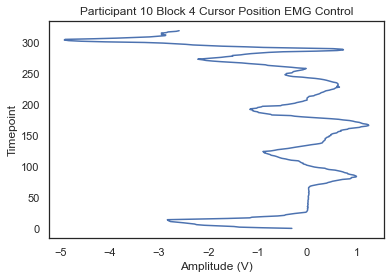

In [6]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        # uncommnent if you read in everything
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            trials = pd.read_csv(os.path.join(b, 'trials.csv'),)  
            
        if  trials["emg"][0] == 1: 
            if os.path.isfile(os.path.join(b, 'data_raw.hdf5')):
                data_raw = h5py.File(os.path.join(b, 'data_raw.hdf5'),)
            if os.path.isfile(os.path.join(b, 'data_proc.hdf5')):
                data_proc = h5py.File(os.path.join(b, 'data_proc.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            
            plt.figure(figsize=(6, 4))
            sns.lineplot(data=data_proc['1'][0:][0])
            sns.lineplot(data=data_proc['1'][0:][1])
            plt.xlabel('Timepoint')
            plt.ylabel('Amplitude (V)')
            plt.title(f'Participant {SN} Block {BN} Normalised EMG Signal')
            
            cursor_position = cursor_position['1'][0:]
            timepoints = range(len(cursor_position))
            
            plt.figure(figsize=(6, 4))
            # sns.lineplot(data=cursor_position['1'][0:], )
            plt.plot(cursor_position, timepoints)
            # sns.lineplot(data=cursor_position['1'][0:][1])
            plt.ylabel('Timepoint')
            plt.xlabel('Amplitude (V)')
            plt.title(f'Participant {SN} Block {BN} Cursor Position EMG Control')
            
            
        if  trials["emg"][0] == 0: 
            if os.path.isfile(os.path.join(b, 'data_raw.hdf5')):
                data_raw = h5py.File(os.path.join(b, 'data_raw.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            
            plt.figure(figsize=(6, 4))
            sns.lineplot(data=data_raw['1'][0:][0])
            sns.lineplot(data=data_raw['1'][0:][1])
            plt.xlabel('Timepoint')
            plt.ylabel('Amplitude (V)')
            plt.title(f'Participant {SN} Block {BN} Joystick Signal')
            
            cursor_position = cursor_position['1'][0:]
            timepoints = range(len(cursor_position))
            
            plt.figure(figsize=(6, 4))
            # sns.lineplot(data=cursor_position['1'][0:], )
            plt.plot(cursor_position, timepoints)
            # sns.lineplot(data=cursor_position['1'][0:][1])
            plt.ylabel('Timepoint')
            plt.xlabel('Amplitude (V)')
            plt.title(f'Participant {SN} Block {BN} Cursor Position Joystick Control')
